In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a = np.zeros((3,3))

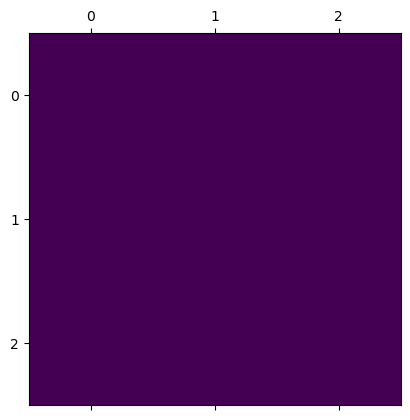

In [5]:
plt.matshow(a)

In [7]:
class mc_search(matrix, start):
    curr = start
    path = []
    def run(steps = 10):
        # next step based on matrix, change curr location
        path.append(curr)
        return path

In [8]:
import numpy as np

# Parameters for the simulation
num_paths = 1  # Number of paths to simulate
num_steps = 10    # Number of steps in each path
matrix_shape = (2, 2)  # Shape of the matrix

# Initialize an array to store the simulation paths
paths = np.zeros((num_paths, num_steps+1, *matrix_shape))


In [9]:

# Initial 2x2 matrix (starting point for all paths)
initial_matrix = np.array([[0, 0], [0, 0]])

# Set the initial state for all paths
paths[:, 0, :, :] = initial_matrix

# Simulate each path
for path in range(num_paths):
    for step in range(1, num_steps+1):
        # Generate random changes for each matrix entry
        delta = np.random.normal(0, 1, size=matrix_shape)
        # Update the matrix for this step based on the previous step
        paths[path, step, :, :] = paths[path, step-1, :, :] + delta

# Example output: Show the first 5 steps of the first 2 paths
paths[:2, :5, :, :]


array([[[[ 0.        ,  0.        ],
         [ 0.        ,  0.        ]],

        [[-0.71568608,  0.61432342],
         [ 0.60011572, -0.06145149]],

        [[-4.01108001,  0.35759728],
         [-0.79718128, -0.53896063]],

        [[-4.39835393,  0.1745088 ],
         [-0.75981423,  0.14731409]],

        [[-4.02054253, -0.58795521],
         [ 0.06847753, -0.48944181]]]])

In [10]:
import random

class mc_search:
    def __init__(self, matrix, start):
        self.matrix = matrix
        self.curr = start
        self.path = [start]
        self.visited = set([start])
        self.rows = len(matrix)
        self.cols = len(matrix[0]) if self.rows > 0 else 0

    def get_neighbors(self, point):
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        neighbors = []
        for dx, dy in directions:
            new_point = (point[0] + dx, point[1] + dy)
            if (0 <= new_point[0] < self.rows and
                    0 <= new_point[1] < self.cols and
                    new_point not in self.visited):
                neighbors.append(new_point)
        return neighbors

    def run(self, steps=10):
        for _ in range(steps):
            neighbors = self.get_neighbors(self.curr)
            if not neighbors:  # If no unvisited neighbors, break out of the loop
                break
            self.curr = random.choice(neighbors)  # Randomly select a new valid position
            self.path.append(self.curr)
            self.visited.add(self.curr)  # Mark the new position as visited
        return self.path

In [13]:
matrix_size = 5
# Create a 5x5 matrix (the content is irrelevant for our pathfinding)
matrix = [[0 for _ in range(matrix_size)] for _ in range(matrix_size)]

# Starting point
start = (0, 0)

# Initialize mc_search with the matrix and starting point
searcher = mc_search(matrix, start)

# Run the pathfinding
path = searcher.run(steps=20)

# Print the path taken
print("Path taken:", path)


Path taken: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (1, 2), (1, 3), (2, 3), (2, 4), (1, 4), (0, 4), (0, 3), (0, 2), (0, 1)]


In [16]:
import random

# Define the chessboard size
BOARD_SIZE = 8

# Moves a knight can make
MOVES = [
    (-2, -1), (-2, 1),
    (-1, -2), (-1, 2),
    (1, -2), (1, 2),
    (2, -1), (2, 1)
]

def is_valid_position(x, y):
    """Check if the knight's position is still on the board."""
    return 0 <= x < BOARD_SIZE and 0 <= y < BOARD_SIZE

def run_simulation(start_x, start_y, num_simulations):
    """Run the knight's run simulation."""
    total_moves = 0

    for _ in range(num_simulations):
        x, y = start_x, start_y
        moves = 0
        
        while True:
            # Choose a random move
            dx, dy = random.choice(MOVES)
            x += dx
            y += dy
            
            # Check if the knight has left the board
            if not is_valid_position(x, y):
                break
            
            moves += 1

        total_moves += moves

    # Calculate the average number of moves
    average_moves = total_moves / num_simulations
    return average_moves

# Example usage
num_simulations = 100000
start_x, start_y = 0, 0  # Starting position of the knight
average_moves = run_simulation(start_x, start_y, num_simulations)
print(f"Average number of moves before leaving the board: {average_moves}")
   

Average number of moves before leaving the board: 0.94291


In [42]:
knight_moves = [[-2, -1], [-2, 1], [-1, -2], [-1, 2], [1, -2], [1, 2], [2, -1], [2, 1]]

In [33]:
random.choice(knight_moves)

(-2, 1)

In [202]:
class mc_search:
    def __init__(self, board_size, start):
        self.board_size = board_size
        self.curr = np.array(start)
        self.path = np.array([self.curr])
        self.knight_moves =  np.array([[-2, -1], [-2, 1], [-1, -2], [-1, 2], [1, -2], [1, 2], [2, -1], [2, 1]])
       
    def valid_positions(self, curr):
        possible_moves = self.knight_moves + curr
        mask = np.all((possible_moves >= 0) & (possible_moves < self.board_size), axis=1)
        possible_moves = possible_moves[mask]
        
        mask = ~(np.any(np.all(possible_moves[:, None] == self.path, axis=2), axis=1))
        possible_moves = possible_moves[mask]
        
        return possible_moves


    def run(self, steps=64):
        for _ in range(steps):
            possible_moves = self.valid_positions(self.curr)

            if len(possible_moves) == 0:
                return self.path
            else:
                self.curr = random.choice(possible_moves)
                self.path = np.append(self.path, [self.curr], axis=0)
                # print(self.path)
                    
        return self.path

In [279]:
b_size = 6
sample1 = mc_search(b_size, [3,3])
sample1.run(64)

counter = 0

# Simulating the loop condition with the initial setup

while len(sample1.path) < (b_size * b_size):
    sample1 = mc_search(b_size, [3,3])
    sample1.run(64)
    counter += 1
    if counter % 10000 == 0:
        print(f"Count: {counter}")

    
    # print(len(sample1.path))

Count: 10000
Count: 20000
Count: 30000
Count: 40000


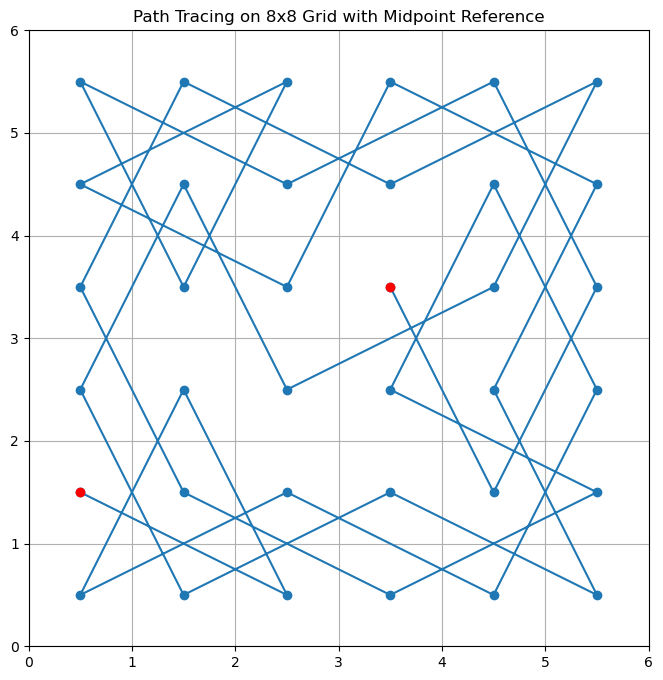

In [282]:
# Adjusting the given path to use the midpoint of the matrix as the reference for plotting points
# Since the grid is 8x8, the midpoint would be at (3.5, 3.5) in a 0-indexed array
mid_point = np.array([.5, .5])

# Adjusting the path points to reflect their position relative to the midpoint
adjusted_path = sample1.path + mid_point

# Plotting the adjusted path on a 8x8 grid
plt.figure(figsize=(8, 8))
plt.xlim(0, b_size)
plt.ylim(0, b_size)
# Draw grid lines
plt.grid(True)
# Plot the adjusted path
plt.plot(adjusted_path[:, 1], adjusted_path[:, 0], marker='o')  # Inverting y to match traditional plotting
plt.plot(adjusted_path[0][1], adjusted_path[0][0], marker='o', color = 'red')
plt.plot(adjusted_path[-1][1], adjusted_path[-1][0], marker='o', color = 'red')# Inverting y to match traditional plotting
plt.title('Path Tracing on 8x8 Grid with Midpoint Reference')
plt.show()


In [268]:
len(sample1.path)

18

In [176]:
arr = np.array([1,1])
arr = np.append([arr],[[1,1]], axis=0)

In [177]:
arr

array([1, 1, 1, 1])

In [42]:
knight_moves = [[-2, -1], [-2, 1], [-1, -2], [-1, 2], [1, -2], [1, 2], [2, -1], [2, 1]]

In [ ]:
knight_moves = [[-2, -1], [-2, 1], [-1, -2], [-1, 2], [1, -2], [1, 2], [2, -1], [2, 1]]

knight_moves = knight_moves + [1,1]

In [49]:
knight_moves

[[-2, -1],
 [-2, 1],
 [-1, -2],
 [-1, 2],
 [1, -2],
 [1, 2],
 [2, -1],
 [2, 1],
 1,
 1,
 1,
 1]

In [51]:
import numpy as np

knight_moves = [
    [-2, -1], [-2, 1],
    [-1, -2], [-1, 2],
    [1, -2], [1, 2],
    [2, -1], [2, 1]
]

# Convert knight_moves to a NumPy array
knight_moves_array = np.array(knight_moves)

# Vector to add
vector = np.array([1, 1])

# Add the vector to each row of knight_moves_array
updated_knight_moves = knight_moves_array + vector

print(updated_knight_moves)


[[-1  0]
 [-1  2]
 [ 0 -1]
 [ 0  3]
 [ 2 -1]
 [ 2  3]
 [ 3  0]
 [ 3  2]]


In [ ]:
asp = [[1,2],[-1,0],[9,0]]

In [72]:
asp = np.array([[1, 2], [-1, 0], [9, 0]])

# Create a boolean mask for rows where all elements are between 0 and 8
mask = [1,2] in asp

# Apply the mask to filter the array
filtered_asp = asp[mask]

print(filtered_asp)

[[[ 1  2]
  [-1  0]
  [ 9  0]]]


In [63]:
filtered_asp

array([[1, 2]])

In [73]:
asp = np.array([[1, 2], [-1, 0], [9, 0]])
path = np.array([[1, 2], [-1, 0], [1, 0]])

# Find rows in asp that are not in path
mask = ~(np.any(np.all(asp[:, None] == path, axis=2), axis=1))

# Apply the mask to asp
filtered_asp = asp[mask]

print(filtered_asp)

[[9 0]]
